### 1. Importing Libraries

In [9]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
random.seed(100)

### 2. Data Preprocessing

In [2]:
dataset = pd.read_csv('P39-Financial-Data.csv')

### 2.1 Feature Engineering

In [3]:
# Feature Engineering
dataset = dataset.drop(columns = ['months_employed'])
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

### 2.2 One-hot encoding

In [4]:
dataset = pd.get_dummies(dataset)
print(dataset.columns)

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')


In [5]:
dataset.head()

,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,3,3,1,550,36200,0.737398,...,0.515977,0.580918,0.380918,10,1,30,1,0,0,0
1,3560428,61,0,3180,6,3,1,600,30150,0.738510,...,0.826402,0.730720,0.630720,9,0,86,0,0,0,1
2,6934997,23,0,1540,0,0,1,450,34550,0.642993,...,0.762284,0.531712,0.531712,7,0,19,0,0,0,1
3,5682812,40,0,5230,6,1,1,700,42150,0.665224,...,0.778831,0.792552,0.592552,8,1,86,1,0,0,0
4,5335819,33,0,3590,5,2,1,1100,53850,0.617361,...,0.665523,0.744634,0.744634,12,0,98,0,0,1,0


#### 2.3 Remove columns

In [6]:
# Removing extra columns
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])
response = dataset["e_signed"]
users = dataset['entry_id']
dataset = dataset.drop(columns = ["e_signed", "entry_id"])

#### 2.4 Splitting into Train and Test Set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

#### 2.5 Feature Scaling

In [10]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [11]:
X_train.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
5957,-0.005991,-0.856349,-0.242358,-1.567782,-0.573557,0.507058,-0.642580,-1.905162,-1.190501,-0.766112,0.979893,-0.229380,-1.060059,-1.057386,1.784494,0.368965,-1.224638,-0.302360,1.976827
16854,-0.509890,-0.856349,-0.052592,0.206559,-0.937970,0.507058,-0.785621,-0.749184,1.254553,0.607772,-0.396208,0.823356,0.041801,-0.672086,-0.663369,-0.280906,-1.224638,3.307315,-0.505861
4429,-0.761840,1.167748,-0.412149,-1.124197,-0.937970,-1.972161,-0.642580,-1.437575,0.532590,-1.485619,-0.086860,-0.775633,0.588358,-0.841550,1.240525,0.195666,0.816568,-0.302360,-0.505861
13607,1.421722,1.167748,-0.638537,0.650144,2.341745,0.507058,-0.785621,-0.680994,-0.642460,1.696278,-1.252980,-1.027524,1.532749,0.817422,-0.119399,2.361903,0.816568,-0.302360,-0.505861
3750,-1.601671,-0.856349,-1.041374,1.093729,2.341745,0.507058,-0.499539,0.780214,-0.248764,-0.315136,-0.910402,0.225551,0.108871,1.541402,-0.935353,-0.150932,0.816568,-0.302360,-0.505861


In [12]:
X_test.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
3629,-1.013789,-0.856349,-0.242358,-1.124197,-1.302383,0.507058,0.358706,-0.944012,0.548408,-1.076350,0.059153,0.326152,0.314517,-0.399633,0.696555,-0.324231,-1.224638,-0.30236,-0.505861
1820,-1.013789,-0.856349,-0.335577,-0.237027,-1.302383,-1.972161,-0.213457,0.767226,-0.024644,-0.047016,-0.029979,0.641494,-0.781613,-0.063715,-1.207338,0.195666,0.816568,-0.30236,-0.505861
6685,0.245958,-0.856349,-0.598586,2.868070,0.884094,0.507058,0.215665,0.757484,-1.051686,-0.521003,-1.033452,-1.293930,-0.505566,-0.503429,-0.391384,-0.844128,-1.224638,-0.30236,-0.505861
17241,0.329941,-0.856349,0.237051,-0.237027,2.341745,0.507058,2.718881,1.264037,-0.268713,-0.313492,-0.381701,1.167423,-0.616575,0.816657,-0.119399,2.361903,-1.224638,-0.30236,1.976827
8332,-0.509890,1.167748,3.357207,-0.237027,-0.937970,0.507058,2.790402,1.189353,-0.224014,1.102305,0.237540,0.350924,1.006524,1.007200,-0.663369,-1.364025,-1.224638,-0.30236,-0.505861


## 3. Model Create

#### 3.1 Logistic Regression

In [14]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [16]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [17]:
results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [18]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817


#### 3.2 SVM (Linear)

In [19]:
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [20]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [21]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [22]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354


#### 3.3 SVM (rbf)

In [23]:
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [24]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [25]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [26]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505


#### 3.4 Random forest

In [27]:
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [28]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [29]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


In [30]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n=100),0.621720,0.640098,0.678942,0.658948


#### 3.4.1 K-fold Cross Validation

In [31]:
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)

In [32]:
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


#### 3.4.2 Parameter tuning

#### Round 1: Entropy

In [33]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

In [34]:
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 3363.97 seconds


In [35]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

#### Round 2: Entropy

In [36]:
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

In [37]:
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 827.97 seconds


In [38]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6356302654508454,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 12})

####  Entropy - Predicting Test Set

In [39]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [40]:
model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [41]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n=100),0.621720,0.640098,0.678942,0.658948
4,"Random Forest (n=100, GSx2 + Entropy)",0.625070,0.640828,0.690353,0.664669


#### Round 3: Gini

In [42]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

In [43]:
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 1585.36 seconds


In [44]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

#### Round 4: Gini

In [45]:
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

In [46]:
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 774.31 seconds


In [47]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.635420816975755,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 2})

#### Gini - Predicting Test Set

In [48]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [49]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n=100),0.621720,0.640098,0.678942,0.658948
4,"Random Forest (n=100, GSx2 + Entropy)",0.625070,0.640828,0.690353,0.664669
5,"Random Forest (n=100, GSx2 + Gini)",0.630932,0.646236,0.694502,0.669500


Test Data Accuracy: 0.6309


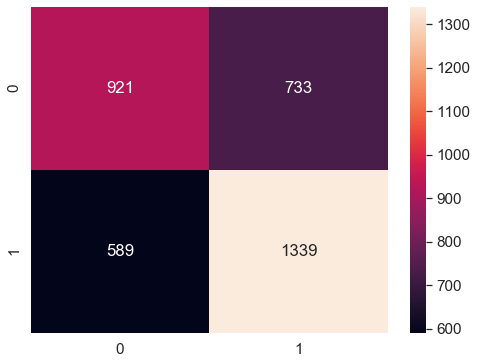

In [50]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,6))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [51]:
# Formatting Final Results
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [52]:
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
31,2881357,0.0,0
33,7048193,1.0,1
37,5815308,1.0,1
44,8700190,1.0,1
45,8232654,0.0,0
